# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv(r"C:\Users\user\Desktop\GitHub Projects\1585247986_Frequentist_Case_Study\archive (3)\insurance2.csv")


In [8]:
medical.shape

(1338, 8)

In [9]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

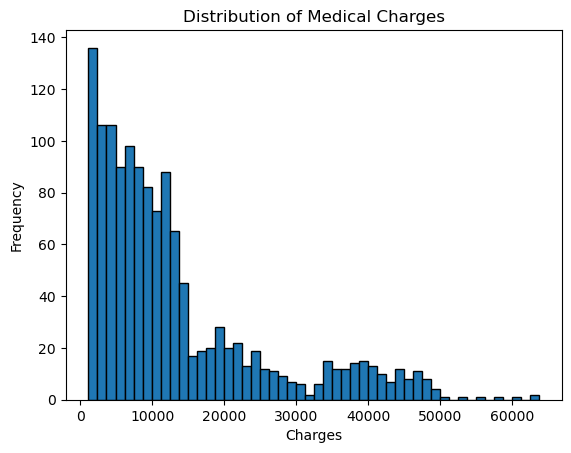

In [10]:
plt.hist(medical['charges'], bins=50, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.show()

In [11]:
# Calculate the mean and standard deviation of charges
mean_charges = medical['charges'].mean()
std_dev_charges = medical['charges'].std()

print(f"Mean of Charges: {mean_charges}")
print(f"Standard Deviation of Charges: {std_dev_charges}")

Mean of Charges: 13270.422265141257
Standard Deviation of Charges: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

A.
For an administrator questioning if the actual average charge has dropped below $12,000, this can be tested with the use of hypothesis testing, one of the core concepts in frequentist statistics, allowing you to see whether there is evidence enough to assert this worry via sample data. Here's how you can justify using the data and decide on the most appropriate frequentist test:

Justification for Using the Data:

Random Sample: If the data is a random sample of the charges, then it should be an adequate representation to draw inferences about the characteristics of the population from which it was drawn. This ensures randomness in a sample, making the sample representative of the population and suitable for statistical inference.
Sample size: The adequacy of sample size affects our ability to make inferences. Increased sample size enhances reliability in the estimation of population parameters and increases the power of the hypothesis test.
Central Limit Theorem (CLT): The CLT states that if the sample size is large, the sampling distribution of the sample mean will approximately follow a normal distribution, regardless of the population's shape. This allows for the application of hypothesis testing techniques based on normal distribution assumptions.
Most Appropriate Frequentist Test: Given the nature of the question, a one-sample t-test is most appropriate. This test is applied when a sample mean (the average charge in this case) is compared against a known or hypothesized population mean ($12,000), especially when the population standard deviation is unknown.

Null Hypothesis (H₀): The actual average charge is $12,000. Formally, H₀:μ=12000.
Alternative Hypothesis (H₁): The actual average charge has fallen below $12,000. Formally, H₁:μ<12000.
Steps to Apply the One-Sample t-Test:

Test Statistic: Calculate the t-statistic using the sample mean, sample standard deviation, and sample size.
Determine the Critical Value or P-value: From the significance level, typically α = 0.05, and calculate the p-value.
Decision Rule: Reject the null hypothesis if the t-statistic is less than the critical value (for a left-tailed test) or if the p-value is less than α. This allows statistical inference on whether the true average charge is likely below $12,000. Rejecting the null hypothesis suggests that the average charge may indeed have fallen below $12,000, necessitating further investigation or action.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [13]:
from scipy.stats import norm
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
sample_size = len(medical['charges'])

# Determine the critical value for a 95% one-sided confidence interval
critical_value = norm.ppf(0.95)

# Calculate the margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(sample_size))

# Calculate the lower bound of the confidence interval
lower_bound = sample_mean - margin_of_error

In [14]:
print(f"Lower bound of the 95% confidence interval: {lower_bound}")

# Comment on the administrator's concern
if lower_bound > 12000:
    print("The administrator should not be concerned, as the lower bound of the 95% confidence interval for the mean charge is above $12,000.")
else:
    print("The administrator might be concerned, as the lower bound of the 95% confidence interval for the mean charge is not confidently above $12,000.")

Lower bound of the 95% confidence interval: 12725.864762144516
The administrator should not be concerned, as the lower bound of the 95% confidence interval for the mean charge is above $12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
By using the ttest_ind function with equal_var=True, we are making the assumption that the variances of the two groups (insured and uninsured) are equal. This is known as the assumption of homogeneity of variances, or the assumption of equal variances. It implies that the variability in charges among those with insurance is roughly the same as the variability in charges among those without insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [17]:
from scipy.stats import t, ttest_ind
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

In [18]:
# 1. Calculate means
mean_insured = np.mean(insured)
mean_uninsured = np.mean(uninsured)

# 2. Calculate standard deviations
std_insured = np.std(insured, ddof=1)
std_uninsured = np.std(uninsured, ddof=1)

# 3. Calculate pooled standard deviation
n_insured = len(insured)
n_uninsured = len(uninsured)
sp = np.sqrt(((std_insured ** 2) + (std_uninsured ** 2)) / 2)

# 4. Calculate t-statistic
t_stat_manual = (mean_insured - mean_uninsured) / (sp * np.sqrt(1/n_insured + 1/n_uninsured))

# 5. Calculate degrees of freedom for the t-distribution
df = n_insured + n_uninsured - 2

# Calculate the p-value
p_value_manual = 2 * (1 - t.cdf(np.abs(t_stat_manual), df))

print(f"Manual T-statistic: {t_stat_manual}")
print(f"Manual P-value: {p_value_manual}")

Manual T-statistic: 12.53754447154839
Manual P-value: 0.0


In [19]:
t_stat, p_value = ttest_ind(insured, uninsured, equal_var=True)

print(f"Scipy T-statistic: {t_stat}")
print(f"Scipy P-value: {p_value}")

Scipy T-statistic: 11.893299030876712
Scipy P-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
The scipy.stats library does not offer a dedicated function for performing z-tests, which compare sample means to population means when the population variance is known or the sample size is large. However, for large samples, the t-test functions in scipy.stats, like ttest_1samp or ttest_ind, closely approximate z-tests since the t-distribution converges to the normal distribution as sample size increases. For specific z-test applications, one can manually calculate z-statistics and p-values using normal distribution functions within scipy.stats, such as norm.sf for p-values or norm.ppf for critical values, leveraging the library's support for normal distribution calculations.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test